In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [57]:
prek_df = pd.read_csv('https://raw.githubusercontent.com/Hossain-MD-Rafat/Midterm-Project-Analyzing-New-York-City-Data/a3ee253cc9b8ab7f1fd3181112348f256682f674/sample_data/PreK_Riders_by_Transportation_Site_20241104.csv')

routes_df = pd.read_csv('https://raw.githubusercontent.com/Hossain-MD-Rafat/Midterm-Project-Analyzing-New-York-City-Data/a3ee253cc9b8ab7f1fd3181112348f256682f674/sample_data/Routes_by_Transportation_Sites_20241104.csv')

sites_df = pd.read_csv('https://raw.githubusercontent.com/Hossain-MD-Rafat/Midterm-Project-Analyzing-New-York-City-Data/a3ee253cc9b8ab7f1fd3181112348f256682f674/sample_data/Transportation_Sites_20241104.csv')

# **Data Cleaning and analysis for Prek Dataframe**

In [58]:
prek_df.head(10)

,School_Year,OPT_Code,Site_Name,School_Name,Number_of_Riders
0,2017-2018,C225,Highbridge Advisory Council,Marshall England,50
1,2019-2020,C275A,Highbridge Advisory Council,Highbridge Advisory Council,67
2,2019-2020,C275B,Highbridge Advisory Council,Highbridge Advisory Council,16
3,2019-2020,C278,Highbridge Advisory Council,Highbridge Advisory Council,12
4,2017-2018,E011,Crossroads School for Child Development,Crossroads School for Child Development,2
5,2017-2018,E019,HASC @ 55th Street,Hebrew Academy for Special Children (HASC),1
6,2017-2018,E082,These Our Treasures (TOTS),These Our Treasures (TOTS),3
7,2017-2018,E148,Happy Dragon of New York Inc.,Happy Dragon of New York Inc.,3
8,2017-2018,E187,TheraCare at Educational Alliance,TheraCare at Educational Alliance,2
9,2015-2016,E044,Little Wonders,Little Wonders,90


In [59]:
prek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   School_Year       1628 non-null   object
 1   OPT_Code          1628 non-null   object
 2   Site_Name         1628 non-null   object
 3   School_Name       1624 non-null   object
 4   Number_of_Riders  1628 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 63.7+ KB


In [60]:
prek_df.describe()

,Number_of_Riders
count,1628.000000
mean,41.732187
std,50.436784
min,1.000000
25%,6.000000
50%,19.000000
75%,65.000000
max,377.000000


In [61]:
print(prek_df.isnull().sum()) # Display the missing values

School_Year         0
OPT_Code            0
Site_Name           0
School_Name         4
Number_of_Riders    0
dtype: int64


In [62]:
#checking duplicate values
prek_df.duplicated().sum()

0

In [63]:
# Step 1: Handle missing values
# Fill missing 'School_Name' values with a placeholder
prek_df['School_Name'].fillna('Unknown', inplace=True)

# Step 2: Ensure consistent data types
# Convert categorical columns to 'category' data type
prek_df['School_Year'] = prek_df['School_Year'].astype('category')
prek_df['OPT_Code'] = prek_df['OPT_Code'].astype('category')
prek_df['Site_Name'] = prek_df['Site_Name'].astype('category')
prek_df['School_Name'] = prek_df['School_Name'].astype('category')

# Step 3: Check for duplicate entries
# Remove duplicate rows if any
prek_df.drop_duplicates(inplace=True)

# Step 4: Standardize text formatting
# Strip whitespace and ensure consistent capitalization in 'Site_Name' and 'School_Name'
prek_df['Site_Name'] = prek_df['Site_Name'].str.strip().str.title()
prek_df['School_Name'] = prek_df['School_Name'].str.strip().str.title()

# Display cleaned data and confirm no missing values remain
print(prek_df.head())
print("\n")
print("Confirm no missing values:\n")
print(prek_df.isnull().sum())

  School_Year OPT_Code                                Site_Name  \
0   2017-2018     C225              Highbridge Advisory Council   
1   2019-2020    C275A              Highbridge Advisory Council   
2   2019-2020    C275B              Highbridge Advisory Council   
3   2019-2020     C278              Highbridge Advisory Council   
4   2017-2018     E011  Crossroads School For Child Development   

                               School_Name  Number_of_Riders  
0                         Marshall England                50  
1              Highbridge Advisory Council                67  
2              Highbridge Advisory Council                16  
3              Highbridge Advisory Council                12  
4  Crossroads School For Child Development                 2  


Confirm no missing values:

School_Year         0
OPT_Code            0
Site_Name           0
School_Name         0
Number_of_Riders    0
dtype: int64


<ipython-input-63-14f4fede48b3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prek_df['School_Name'].fillna('Unknown', inplace=True)


In [64]:
# Finding Outliers by Calculating IQR -
# Calculate IQR
Q1 = prek_df['Number_of_Riders'].quantile(0.25)
Q3 = prek_df['Number_of_Riders'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = prek_df[(prek_df['Number_of_Riders'] < lower_bound) | (prek_df['Number_of_Riders'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(outliers_iqr)}")


Number of outliers using IQR method: 58


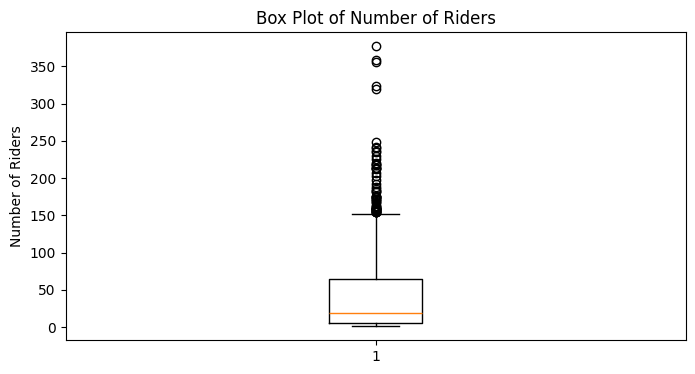

In [65]:
# Box plot
plt.figure(figsize=(8, 4))
plt.boxplot(prek_df['Number_of_Riders'])
plt.title('Box Plot of Number of Riders')
plt.ylabel('Number of Riders')
plt.show()

Insights-
1. The box in the middle covers most of the data, with the line in the box marking the median (middle value).
2. The small circles above the whiskers are outliers. These are unusual values that are much higher than most of the other data.

In [66]:
# Function to replace outliers with mean based on IQR method
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the mean of the column
    mean_value = df[column].mean()

    # Replace outliers with mean
    df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# Replace outliers in 'Number_of_Riders' column of prek_df
replace_outliers_with_mean(prek_df, 'Number_of_Riders')

# Display the modified datasets
print("Riders Data (with outliers replaced):")
print(prek_df.head())


Riders Data (with outliers replaced):
  School_Year OPT_Code                                Site_Name  \
0   2017-2018     C225              Highbridge Advisory Council   
1   2019-2020    C275A              Highbridge Advisory Council   
2   2019-2020    C275B              Highbridge Advisory Council   
3   2019-2020     C278              Highbridge Advisory Council   
4   2017-2018     E011  Crossroads School For Child Development   

                               School_Name  Number_of_Riders  
0                         Marshall England              50.0  
1              Highbridge Advisory Council              67.0  
2              Highbridge Advisory Council              16.0  
3              Highbridge Advisory Council              12.0  
4  Crossroads School For Child Development               2.0  


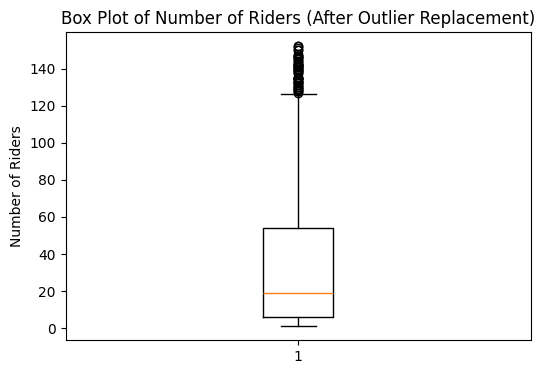

In [67]:
# Plotting the box plot for 'Number_of_Riders' column after replacing outliers
plt.figure(figsize=(6, 4))
plt.boxplot(prek_df['Number_of_Riders'])
plt.title('Box Plot of Number of Riders (After Outlier Replacement)')
plt.ylabel('Number of Riders')
plt.show()

Insights:
1.  The orange line within the box represents the median number of riders, which appears to be around 20.
2.  Outliers are present above the upper whisker, but the number is significantly reduced due to mean replacement.
3. The lower whisker extends close to zero, indicating that the minimum number of riders recorded is low or close to zero.
4. The mean replacement has minimized the impact of very high values, resulting in a distribution that is less skewed and closer to a normal distribution

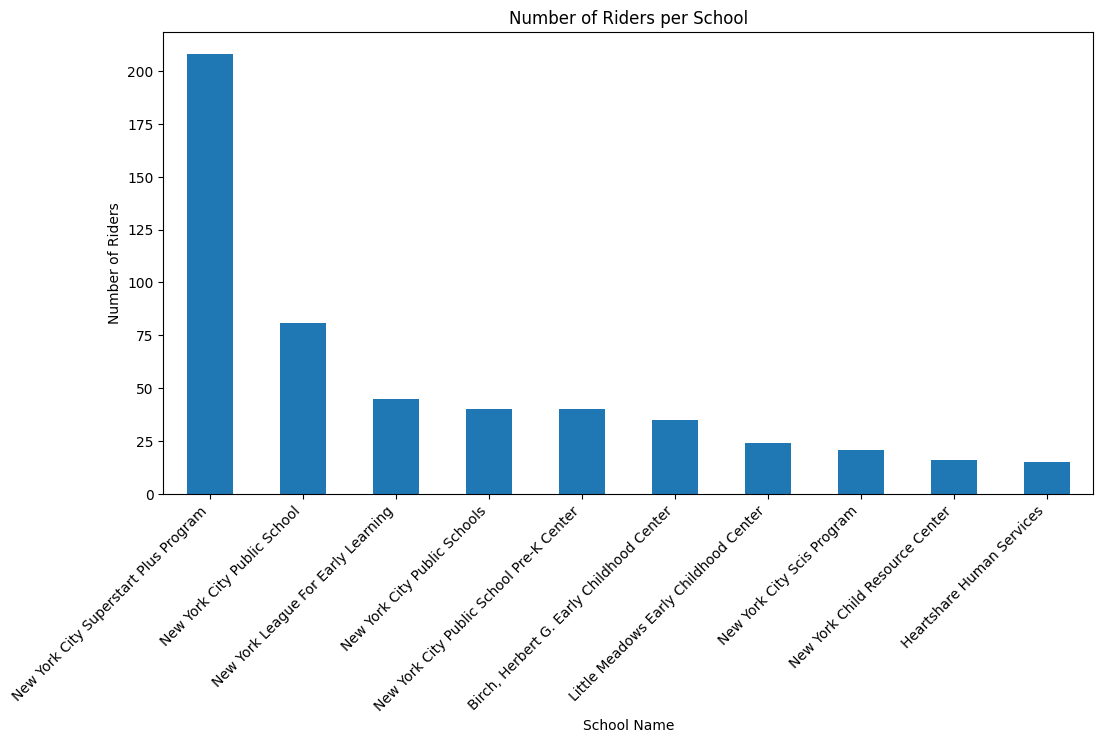

In [68]:
# Create bar plot Riders per School
top_10_schools = prek_df['School_Name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
prek_df['School_Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Number of Riders per School')
plt.xlabel('School Name')
plt.ylabel('Number of Riders')
plt.xticks(ticks=range(len(top_10_schools)), labels=top_10_schools.index, rotation=45, ha='right', va='top')
plt.show()

This barplot shows us the top 10 schools by riders count which is interesting because the first one seems to be the largest by a good amount. First place has over 200 riders whereas second place had just over 75. Another takeaway is that most of the schools, which is a lot, have under 25 riders.

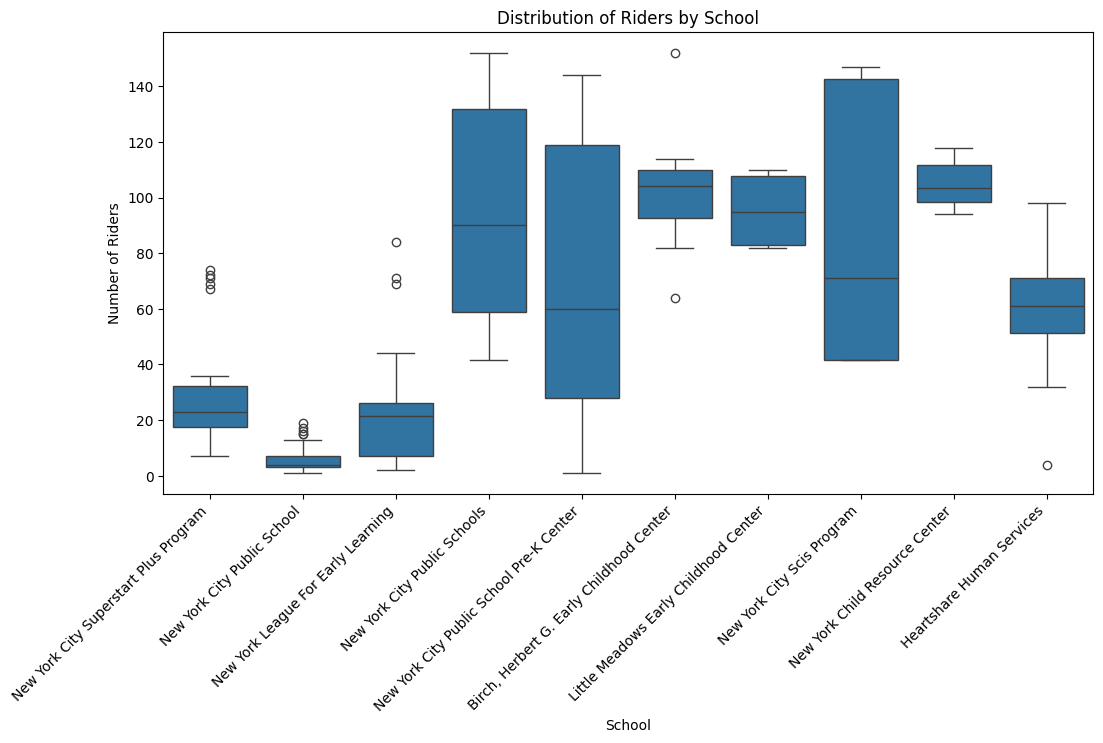

In [69]:
top_10_schools_total = prek_df.groupby('School_Name')['Number_of_Riders'].sum().nlargest(10).index
prek_df_top_10 = prek_df[prek_df['School_Name'].isin(top_10_schools_total)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='School_Name', y='Number_of_Riders', data=prek_df_top_10)
plt.title('Distribution of Riders by School')
plt.xlabel('School')
plt.ylabel('Number of Riders')
plt.xticks(ticks=range(len(top_10_schools)), labels=top_10_schools.index, rotation=45, ha='right', va='top')
plt.show()

So, in this boxplot we can see the spread of riders in different schools which had a couple of interesting conclusions. The top school had a really small plot, meaning it had a fairly small variation, but it also had the most outliers in this graph which is worth investigation. New York City Public School Pre-K Center had the largest variation and no outliers.

<ipython-input-70-694b88b64b6e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riders_per_year = prek_df.groupby(['School_Year', 'School_Name'])['Number_of_Riders'].sum().reset_index()


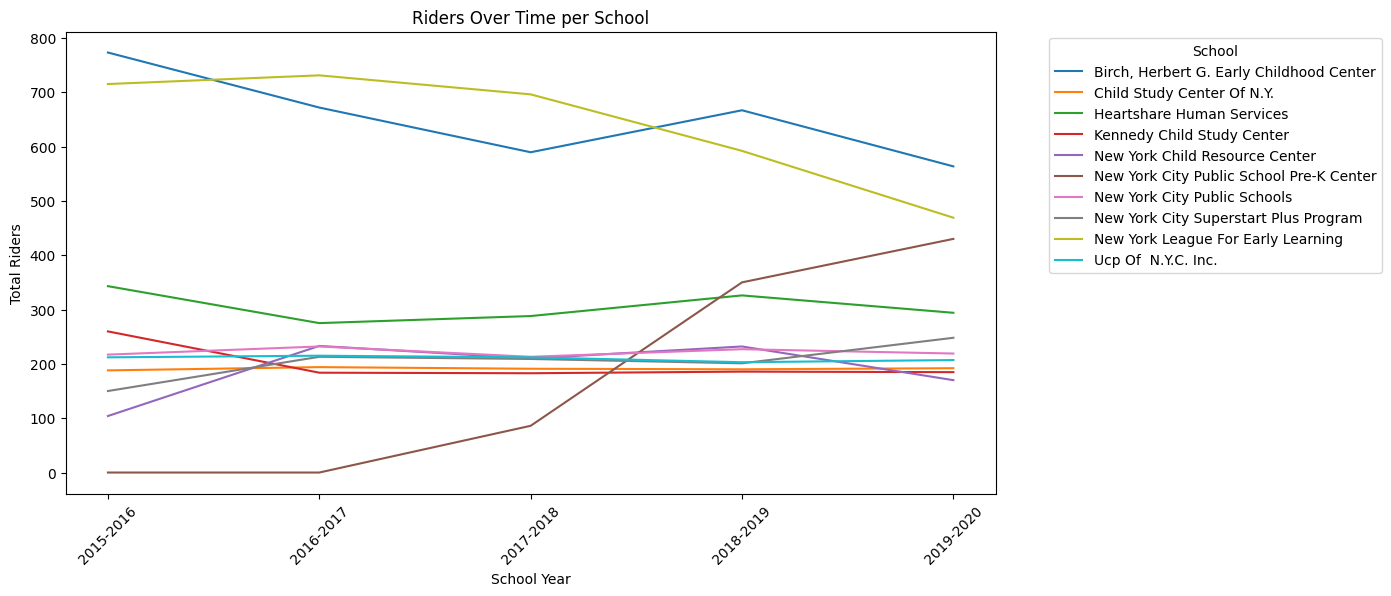

In [70]:
# Create lineplot to show Riders over time per School
total_riders_per_school = prek_df.groupby('School_Name')['Number_of_Riders'].sum().nlargest(10).index
riders_per_year = prek_df.groupby(['School_Year', 'School_Name'])['Number_of_Riders'].sum().reset_index()
riders_per_year_top_10 = riders_per_year[riders_per_year['School_Name'].isin(total_riders_per_school)]
plt.figure(figsize=(12, 6))
sns.lineplot(x='School_Year', y='Number_of_Riders', hue='School_Name', data=riders_per_year_top_10)
plt.title('Riders Over Time per School')
plt.xlabel('School Year')
plt.ylabel('Total Riders')
plt.xticks(rotation=45)
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Some key takeaways from this lineplot are: the same NYC P.S. Pre-K Center has the largest increase in this graph which supports the previous conclusion of it having the largest variation as well; Birch and NY League had the highest consistent number of riders throughout the past 5 years with an overall decline for both; the rest of the schools were pretty steady at around 100-300 riders per year.

#**Data Cleaning and analysis for Routes Dataframe**

In [71]:
routes_df.head(10)

,School_Year,Route_Number,OPT_Code
0,2015-2016,J698,75004
1,2015-2016,J699,75580
2,2015-2016,J700,75003
3,2015-2016,J700,75140
4,2015-2016,J701,75003
5,2015-2016,J701,75140
6,2015-2016,J702,75003
7,2015-2016,J702,75140
8,2015-2016,J703,75003
9,2015-2016,J703,75140


In [72]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129747 entries, 0 to 129746
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   School_Year   129747 non-null  object
 1   Route_Number  129747 non-null  object
 2   OPT_Code      129747 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [73]:
routes_df.isnull().sum()

,0
School_Year,0
Route_Number,0
OPT_Code,0


In [74]:
#checking duplicates values
routes_df.duplicated().sum()

0

In [75]:
# Step 1: Ensure consistent data types
routes_df['School_Year'] = routes_df['School_Year'].astype('category')
routes_df['Route_Number'] = routes_df['Route_Number'].str.strip().astype('category')
routes_df['OPT_Code'] = routes_df['OPT_Code'].astype('category')

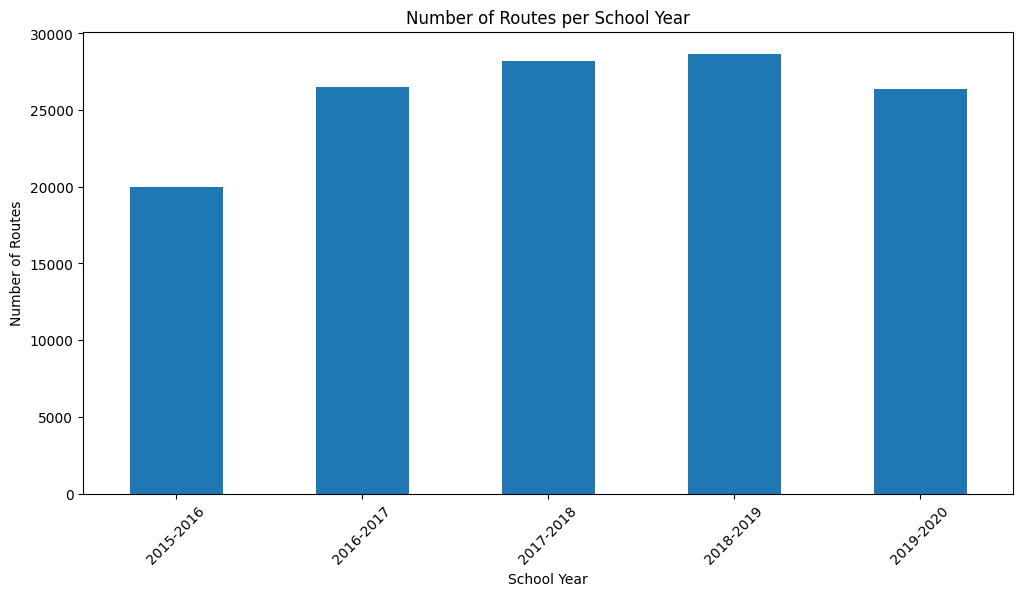

In [76]:
# Create barplot to count Routes per School Year
route_count_per_year = routes_df['School_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
route_count_per_year.plot(kind='bar')
plt.title('Number of Routes per School Year')
plt.xlabel('School Year')
plt.ylabel('Number of Routes')
plt.xticks(rotation=45)
plt.show()

This barplot shows us that number of routes increased steadily over time, reaching a peak of around 28000 routes in 2018-2019, before dipping slightly in the following school year to a total of around 26000 routes. It's interesting to note that Covid happened in 2020 which could contribute to the slight dip.

<ipython-input-77-85e4881d9d15>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  opt_count_per_year = routes_df.groupby('School_Year')['OPT_Code'].nunique()


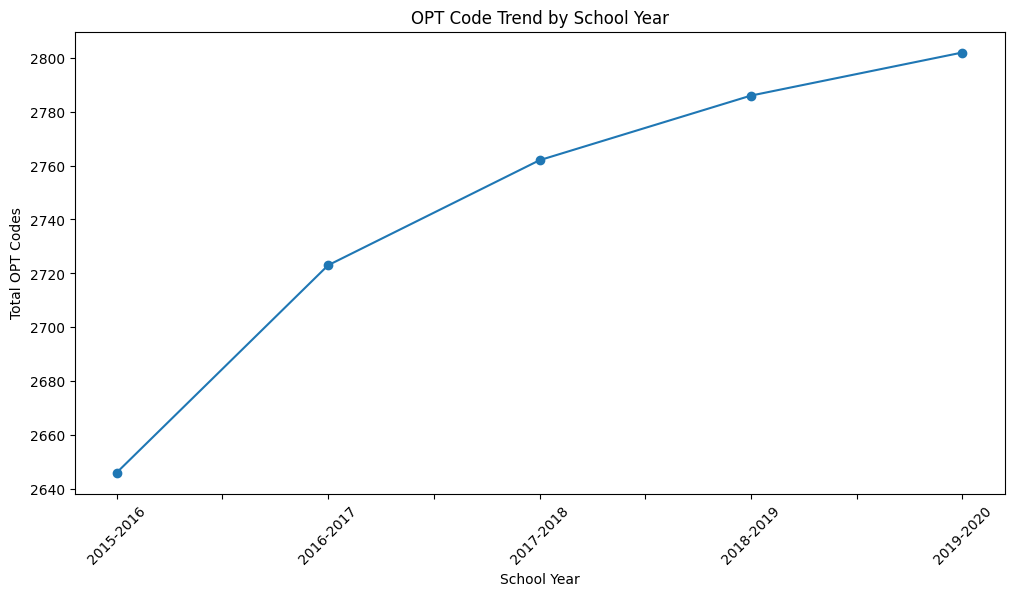

In [77]:
# Create lineplot of unique OPT Codes by School Year (OPT represents schools)
opt_count_per_year = routes_df.groupby('School_Year')['OPT_Code'].nunique()
plt.figure(figsize=(12, 6))
opt_count_per_year.plot(kind='line', marker='o')
plt.title('OPT Code Trend by School Year')
plt.xlabel('School Year')
plt.ylabel('Total OPT Codes')
plt.xticks(rotation=45)
plt.show()

This lineplot shows us that the number of OPT Codes increased steadily over time, reaching its peak in 2019-2020 at about 2800. OPT Codes are seemingly correlated to the schools, based on the original datasets, so this tells us that the number of schools participating in these transportation routes is increasing and most likely will continue to increase.

#**Data Cleaning and analysis for Transportation sites Dataframe**

In [78]:
sites_df.head(10)

,School_Year,OPT_Code,Name,Affiliation,Site_Type,Street_Address,City,State,Zip,Longitude,Latitude,Door_To_Door_Service,Stop_To_School_Service,Common_Carrier_Svc_Metrocards,Site_Reimbursement,Mid_Day_Service,D2D_Late_Day_Programs,S2S_Late_Day_Programs
0,2016-2017,01001,Comprehensive Kids Devel. Scho,Other Religion,School,101 Norfolk Street,Manhattan,NY,10002.0,-73.987271,40.718791,Yes,No,No,No,No,No,No
1,2016-2017,01569,BARD HS EARLY COLLEGE,Public,School,525 EAST HOUSTON STREET,Manhattan,NY,10002.0,-73.975438,40.718761,Yes,No,Yes,No,No,No,No
2,2016-2017,01600,SATELLITE ACADEMY,Public,School,198 FORSYTH STREET,Manhattan,NY,10002.0,-73.990635,40.722491,No,No,Yes,No,No,No,No
3,2016-2017,01616,COOK CTR GRAMMAR SCHOOL,Nonsectarian,School,219 STANTON STREET,Manhattan,NY,10002.0,-73.982171,40.719442,Yes,No,Yes,No,Yes,No,No
4,2016-2017,01657,MANHATTAN CHARTER SCHOOL,Charter,School,100 ATTORNEY STREET,Manhattan,NY,10002.0,-73.984365,40.718346,Yes,Yes,Yes,No,Yes,No,No
5,2016-2017,01658,GIRLS PREP CHARTER SCH NY ELEM,Charter,School,442 EAST HOUSTON STREET,Manhattan,NY,10002.0,-73.977811,40.719730,Yes,Yes,Yes,No,Yes,No,No
6,2016-2017,01659,GIRLS PREP CHARTER SCH NY MS,Charter,School,420 EAST 12TH STREET,Manhattan,NY,10009.0,-73.982949,40.729667,Yes,Yes,Yes,No,Yes,No,No
7,2016-2017,01817,BETH JACOB SCHOOL,Yeshiva,School,142 BROOME STREET,Manhattan,NY,10002.0,-73.984109,40.716355,No,Yes,Yes,No,Yes,No,Yes
8,2016-2017,01854,LOWER EAST SIDE PREP,Public,School,145 STANTON STREET,Manhattan,NY,10002.0,-73.985688,40.720511,No,No,Yes,No,Yes,No,No
9,2016-2017,01867,Thompkins Square Middle School,Public,School,600 EAST 6TH STREET,Manhattan,NY,10009.0,-73.981338,40.724272,Yes,Yes,Yes,No,No,No,No


In [79]:
sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22891 entries, 0 to 22890
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   School_Year                    22891 non-null  object 
 1   OPT_Code                       22891 non-null  object 
 2   Name                           22891 non-null  object 
 3   Affiliation                    20594 non-null  object 
 4   Site_Type                      22891 non-null  object 
 5   Street_Address                 22891 non-null  object 
 6   City                           22891 non-null  object 
 7   State                          22881 non-null  object 
 8   Zip                            22881 non-null  float64
 9   Longitude                      22891 non-null  float64
 10  Latitude                       22891 non-null  float64
 11  Door_To_Door_Service           22891 non-null  object 
 12  Stop_To_School_Service         22891 non-null 

In [80]:
sites_df.isnull().sum()

,0
School_Year,0
OPT_Code,0
Name,0
Affiliation,2297
Site_Type,0
Street_Address,0
City,0
State,10
Zip,10
Longitude,0


In [81]:
# Data Cleaning for sites_df

# 1. Handling Missing Values
# Fill missing values in 'Affiliation' with 'Unknown'
sites_df['Affiliation'].fillna('Unknown', inplace=True)
# Fill missing values in 'State' with 'Unknown' and in 'Zip' with an empty string
sites_df['State'].fillna('Unknown', inplace=True)
sites_df['Zip'].fillna('', inplace=True)

# 2. Data Type Corrections
# Convert 'Zip' to string to handle it properly as a text field (preserving leading zeros)
sites_df['Zip'] = sites_df['Zip'].astype(str).str.replace('.0', '', regex=False)

# 3. Drop Duplicates
# Drop duplicate rows based on unique identifiers (e.g., 'OPT_Code' and 'School_Year')
sites_df.drop_duplicates(subset=['OPT_Code', 'School_Year'], keep='first', inplace=True)

# Display cleaned data summary
print("Data cleaned successfully\n")
print(sites_df.isnull().sum())
print("\n")
print(sites_df.head())
print("\n")


Data cleaned successfully

School_Year                      0
OPT_Code                         0
Name                             0
Affiliation                      0
Site_Type                        0
Street_Address                   0
City                             0
State                            0
Zip                              0
Longitude                        0
Latitude                         0
Door_To_Door_Service             0
Stop_To_School_Service           0
Common_Carrier_Svc_Metrocards    0
Site_Reimbursement               0
Mid_Day_Service                  0
D2D_Late_Day_Programs            0
S2S_Late_Day_Programs            0
dtype: int64


  School_Year OPT_Code                            Name     Affiliation  \
0   2016-2017    01001  Comprehensive Kids Devel. Scho  Other Religion   
1   2016-2017    01569           BARD HS EARLY COLLEGE          Public   
2   2016-2017    01600               SATELLITE ACADEMY          Public   
3   2016-2017    01616         C

<ipython-input-81-a4337eca2f6d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sites_df['Affiliation'].fillna('Unknown', inplace=True)
<ipython-input-81-a4337eca2f6d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [82]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in Longitude and Latitude
longitude_outliers = detect_outliers_iqr(sites_df, 'Longitude')
latitude_outliers = detect_outliers_iqr(sites_df, 'Latitude')

# Print results
if not longitude_outliers.empty:
    print(f"Outliers detected in 'Longitude': {len(longitude_outliers)} entries")
    print(longitude_outliers[['Longitude']])
else:
    print("No outliers detected in 'Longitude'.")

if not latitude_outliers.empty:
    print(f"Outliers detected in 'Latitude': {len(latitude_outliers)} entries")
    print(latitude_outliers[['Latitude']])
else:
    print("No outliers detected in 'Latitude'.")

Outliers detected in 'Longitude': 1614 entries
          Longitude
3503  -7.424409e+01
3505  -7.421136e+01
3506  -7.419465e+01
3507  -7.418758e+01
3508  -7.423101e+01
...             ...
22886  1.014851e+06
22887  1.013310e+06
22888  1.018315e+06
22889  1.016413e+06
22890  1.015376e+06

[1614 rows x 1 columns]
Outliers detected in 'Latitude': 821 entries
            Latitude
3755       41.258395
3773       41.192412
3774       41.135554
3776       41.457900
3785       41.068698
...              ...
22886  239035.000000
22887  252288.000000
22888  238696.000000
22889  249181.000000
22890  243830.000000

[821 rows x 1 columns]


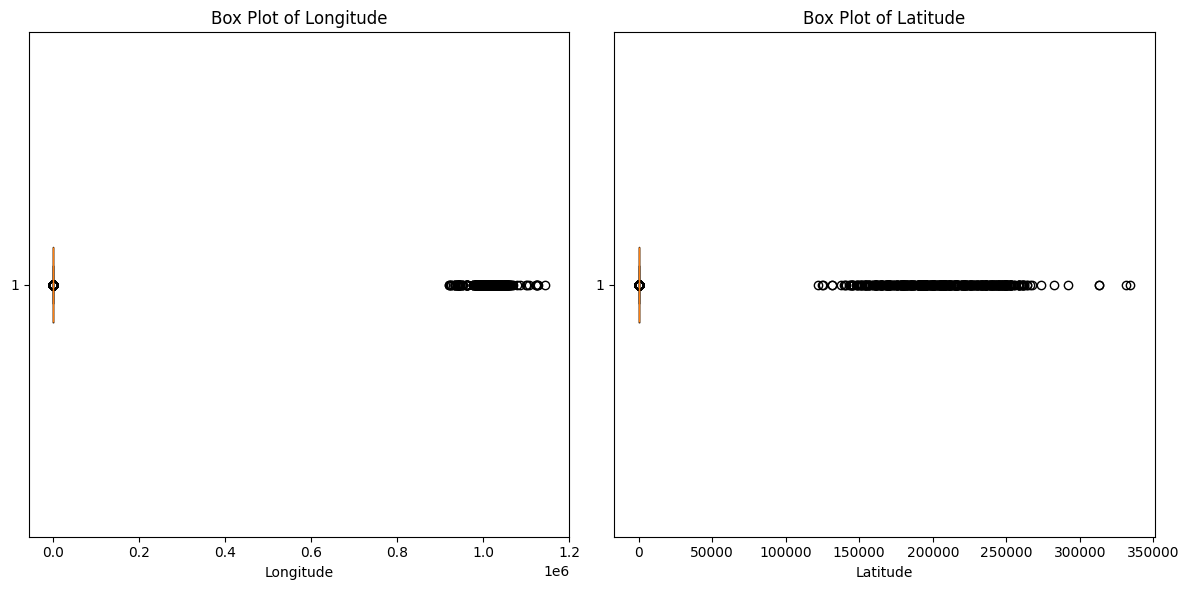

In [83]:
# Generate box plots to visualize outliers in 'Longitude' and 'Latitude'
plt.figure(figsize=(12, 6))

# Box plot for Longitude
plt.subplot(1, 2, 1)
plt.boxplot(sites_df['Longitude'], vert=False)
plt.title('Box Plot of Longitude')
plt.xlabel('Longitude')

# Box plot for Latitude
plt.subplot(1, 2, 2)
plt.boxplot(sites_df['Latitude'], vert=False)
plt.title('Box Plot of Latitude')
plt.xlabel('Latitude')

# Display the box plots
plt.tight_layout()
plt.show()

Insights:

**1. Longitude:**

1.1 The box plot for Longitude shows that most values are concentrated within a relatively narrow range.

1.2 There are some points outside the whiskers, indicating potential outliers.

**2. Latitude:**

2.1 Similarly, the Latitude box plot reveals some data points lying outside the whiskers, marking them as potential outliers.

In [84]:
# Replace the outliers with median values

# Calculate median values for Longitude and Latitude
longitude_median = sites_df['Longitude'].median()
latitude_median = sites_df['Latitude'].median()
print(f"Median Longitude: {longitude_median}")
print(f"Median Latitude: {latitude_median}")

# Replace outliers in Longitude and Latitude with the median values
sites_df.loc[longitude_outliers.index, 'Longitude'] = longitude_median
sites_df.loc[latitude_outliers.index, 'Latitude'] = latitude_median

# Display a summary to confirm replacements
print("Outliers have been replaced with median values.")
print(sites_df[['Longitude', 'Latitude']].describe())

Median Longitude: -73.927919
Median Latitude: 40.729672
Outliers have been replaced with median values.
          Longitude      Latitude
count  22891.000000  22891.000000
mean     -73.919206     40.733139
std        0.075399      0.089751
min      -74.142830     40.468987
25%      -73.968646     40.670199
50%      -73.927919     40.729672
75%      -73.881945     40.806230
max      -73.696020     41.035867


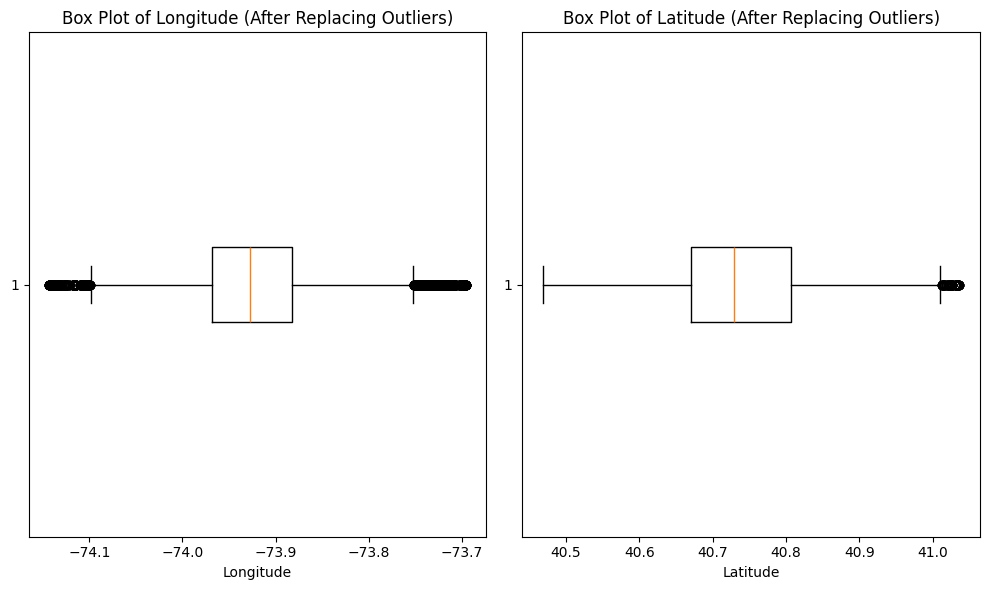

In [85]:
# Generate box plots to visualize the cleaned Longitude and Latitude columns
plt.figure(figsize=(10, 6))

# Box plot for Longitude
plt.subplot(1, 2, 1)
plt.boxplot(sites_df['Longitude'], vert=False)
plt.title('Box Plot of Longitude (After Replacing Outliers)')
plt.xlabel('Longitude')

# Box plot for Latitude
plt.subplot(1, 2, 2)
plt.boxplot(sites_df['Latitude'], vert=False)
plt.title('Box Plot of Latitude (After Replacing Outliers)')
plt.xlabel('Latitude')

# Display the box plots
plt.tight_layout()
plt.show()

Insights:

**1. Longitude Box Plot:**

1.1 Range: The majority of the Longitude values lie between approximately -74.0 and -73.8.

1.2 Outliers: There are still a few points that fall slightly outside this range. However, these outliers are now less extreme due to the replacement with the median, making the distribution more stable.

**2. Latitude Box Plot:**

2.1 Range: Most of the Latitude values are now concentrated between approximately 40.5 and 40.8.

2.2 Outliers: Similar to longitude, the latitude plot shows a few points on the edges. However, the median replacement has minimized the impact of these outliers.

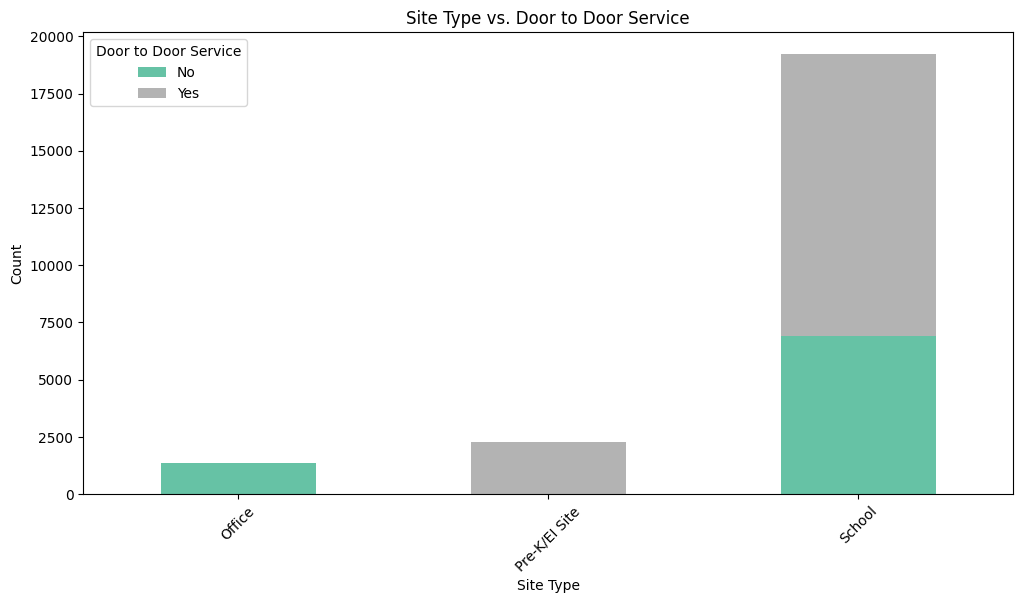

In [86]:
# Create stacked barplot to compare Site Type and Door to Door Service
door_to_door_by_site = pd.crosstab(sites_df['Site_Type'], sites_df['Door_To_Door_Service'])
door_to_door_by_site.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Site Type vs. Door to Door Service')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Door to Door Service', loc='upper left')
plt.show()

This stacked barplot shows us the door-to-door service status by site type with offices having no door-to-door service, pre-k/EI sites having door-to-door service and schools having a mix of the two. My hypothesis would be that places with young children would provide door-to-door service which is why some schools are included (most likely elementary).

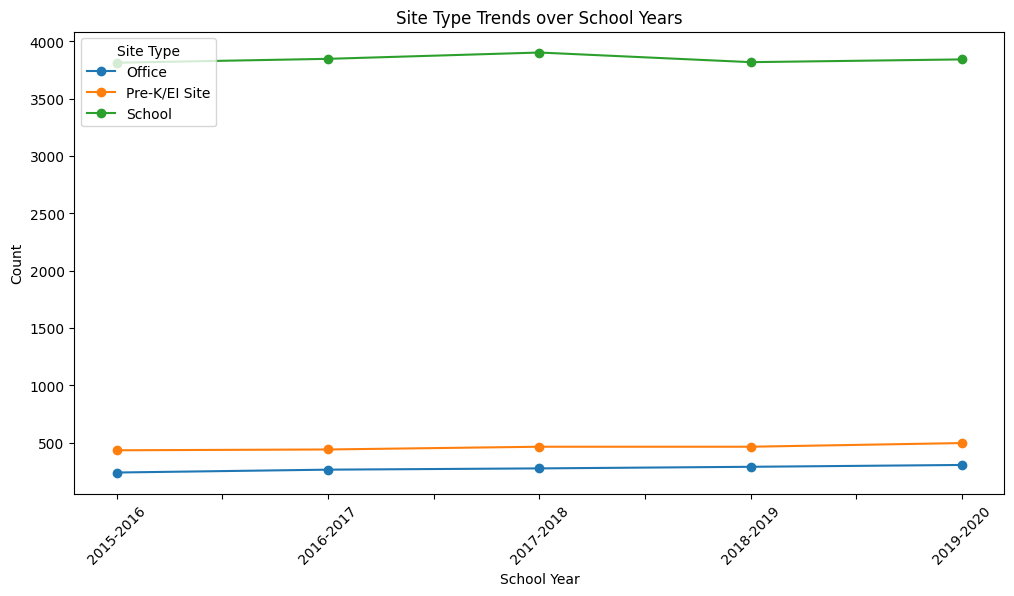

In [87]:
# Create lineplot for Site Type trends over School Years
site_type_trends = sites_df.groupby('School_Year')['Site_Type'].value_counts().unstack()
site_type_trends.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Site Type Trends over School Years')
plt.xlabel('School Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Site Type', loc='upper left')
plt.show()

Based on the first graph, I wanted to do some more plots about site types, so this line plot shows the trends of site types over time. Offices and Pre-K/EI sites remained steady all throughout whereas schools fluctuated a bit. Still, there were no significant changes in any of the site types.

#**SQL Quesries**

In [88]:
# Create an SQLite database in memory (temporary) or as a file
conn = sqlite3.connect("school_transportation.db")  # This will create a file called 'school_transportation.db'

# Save cleaned DataFrames to SQLite tables
sites_df.to_sql("TransportationSites", conn, if_exists="replace", index=False)
routes_df.to_sql("RoutesBySites", conn, if_exists="replace", index=False)
prek_df.to_sql("PreKRidersBySites", conn, if_exists="replace", index=False)

print("Tables created in SQLite database.")

Tables created in SQLite database.


In [89]:
# Define a function to execute SQL queries and return a DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

# 6 SQL queries:-

# 1. List all unique cities in the TransportationSites table
query1 = "SELECT DISTINCT City FROM TransportationSites;"
result1 = run_query(query1)
print("Unique Cities in TransportationSites:\n")
print(result1)

print("\n")

# 2. Find the number of routes per site in the RoutesBySites table
query2 = """
    SELECT OPT_Code, COUNT(Route_Number) AS Number_of_Routes
    FROM RoutesBySites
    GROUP BY OPT_Code;
"""
result2 = run_query(query2)
print("Number of Routes per Site:\n")
print(result2)

print("\n")

# 3. Calculate the average number of PreK riders by school year in the PreKRidersBySites table
query3 = """
    SELECT School_Year, AVG(Number_of_Riders) AS Average_Riders
    FROM PreKRidersBySites
    GROUP BY School_Year;
"""
result3 = run_query(query3)
print("Average Number of PreK Riders by School Year:\n")
print(result3)

print("\n")

# 4. Get all school names with more than 50 PreK riders
query4 = """
    SELECT School_Name, Number_of_Riders
    FROM PreKRidersBySites
    WHERE Number_of_Riders > 50;
"""
result4 = run_query(query4)
print("Schools with More than 50 PreK Riders:\n")
print(result4)

print("\n")

# 5. Join TransportationSites and RoutesBySites on OPT_Code to find transportation sites with associated routes
query5 = """
    SELECT TS.Name, TS.City, R.Route_Number
    FROM TransportationSites AS TS
    JOIN RoutesBySites AS R
    ON TS.OPT_Code = R.OPT_Code;
"""
result5 = run_query(query5)
print("Transportation Sites with Associated Routes:\n")
print(result5)

print("\n")

# 6. Retrieve details of sites providing both Door-to-Door and Stop-to-School services
query6 = """
    SELECT Name, City, Door_To_Door_Service, Stop_To_School_Service
    FROM TransportationSites
    WHERE Door_To_Door_Service = 'Yes' AND Stop_To_School_Service = 'Yes';
"""
result6 = run_query(query6)
print("Sites with Both Door-to-Door and Stop-to-School Services:\n")
print(result6)

Unique Cities in TransportationSites:

            City
0      Manhattan
1          Bronx
2       Brooklyn
3         Queens
4  Staten Island
5     New Jersey
6    Westchester
7         Nassau
8    Connecticut


Number of Routes per Site:

     OPT_Code  Number_of_Routes
0       10003                49
1       10004                46
2       10005                35
3       10007                58
4       10008                67
...       ...               ...
3163     9724                 1
3164     9725                11
3165     9730                30
3166     9784                10
3167     9818                25

[3168 rows x 2 columns]


Average Number of PreK Riders by School Year:

  School_Year  Average_Riders
0   2015-2016       38.309352
1   2016-2017       36.128573
2   2017-2018       35.140539
3   2018-2019       36.231056
4   2019-2020       34.903840


Schools with More than 50 PreK Riders:

                                  School_Name  Number_of_Riders
0                

Insights:
1. The transportation network serves not only NYC's five boroughs but also extends to neighboring areas like New Jersey, Westchester, Nassau, and Connecticut.
2. The average number of PreK riders has gradually decreased over the years, from about 38.3 riders in 2015-2016 to around 34.9 in 2019-2020.
3.  Certain schools have very high PreK ridership, indicating a concentration of young students in specific locations.
4. A significant number of sites offer both Door-to-Door and Stop-to-School services, with over 6,700 entries that provide both service types.


In [90]:
conn.close()
print("SQLite connection closed.")

SQLite connection closed.


# **Project Objectives and Data visualization**

**Objectives**


*   How
*   List item



<ipython-input-101-7dbafe67d8d0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riders_by_year = prek_df.groupby('School_Year')['Number_of_Riders'].sum().reset_index()


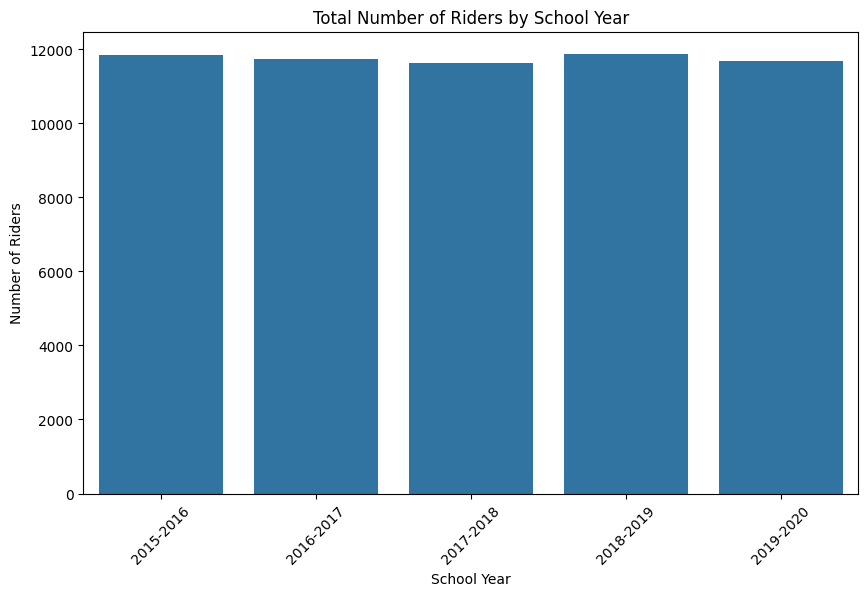

In [101]:
# Calculate total riders by year from Data1
riders_by_year = prek_df.groupby('School_Year')['Number_of_Riders'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='School_Year', y='Number_of_Riders', data=riders_by_year)
plt.title('Total Number of Riders by School Year')
plt.xlabel('School Year')
plt.ylabel('Number of Riders')
plt.xticks(rotation=45)
plt.show()

In [92]:
for site_name in prek_df['Site_Name'].unique():
  riders_by_year = prek_df.groupby(['School_Year', prek_df['Site_Name'] == site_name], observed=False)['Number_of_Riders'].sum().reset_index()
  riders_by_year = riders_by_year[(riders_by_year['Site_Name'] == True)]
  print(site_name)
  print(riders_by_year.groupby('Site_Name', observed=False)['School_Year'].value_counts())
  print('*' * 50)

Highbridge Advisory Council
Site_Name  School_Year
True       2015-2016      1
           2016-2017      1
           2017-2018      1
           2018-2019      1
           2019-2020      1
Name: count, dtype: int64
**************************************************
Crossroads School For Child Development
Site_Name  School_Year
True       2015-2016      1
           2016-2017      1
           2017-2018      1
           2018-2019      1
           2019-2020      1
Name: count, dtype: int64
**************************************************
Hasc @ 55Th Street
Site_Name  School_Year
True       2015-2016      1
           2016-2017      1
           2017-2018      1
           2018-2019      1
           2019-2020      1
Name: count, dtype: int64
**************************************************
These Our Treasures (Tots)
Site_Name  School_Year
True       2015-2016      1
           2016-2017      1
           2017-2018      1
           2018-2019      1
           2019-2020      1
Nam

In [111]:
routes_by_year = routes_df.groupby('School_Year', observed=False)['Route_Number'].nunique().reset_index()
routes_by_year

,School_Year,Route_Number
0,2015-2016,9944
1,2016-2017,10624
2,2017-2018,10861
3,2018-2019,10878
4,2019-2020,11122


Text(0.5, 0, 'School Year')

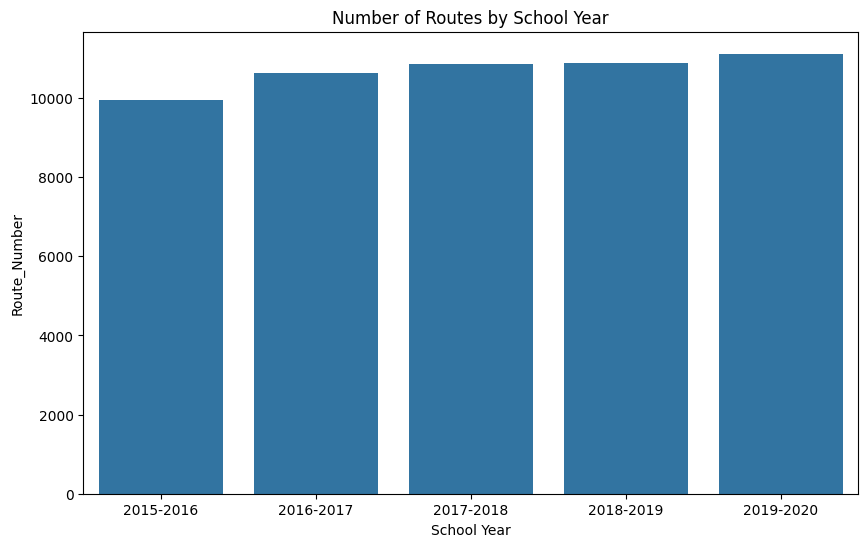

In [112]:
#creat a histogram for routes by year
plt.figure(figsize=(10, 6))
sns.barplot(x='School_Year', y='Route_Number', data=routes_by_year)
plt.title('Number of Routes by School Year')
plt.xlabel('School Year')

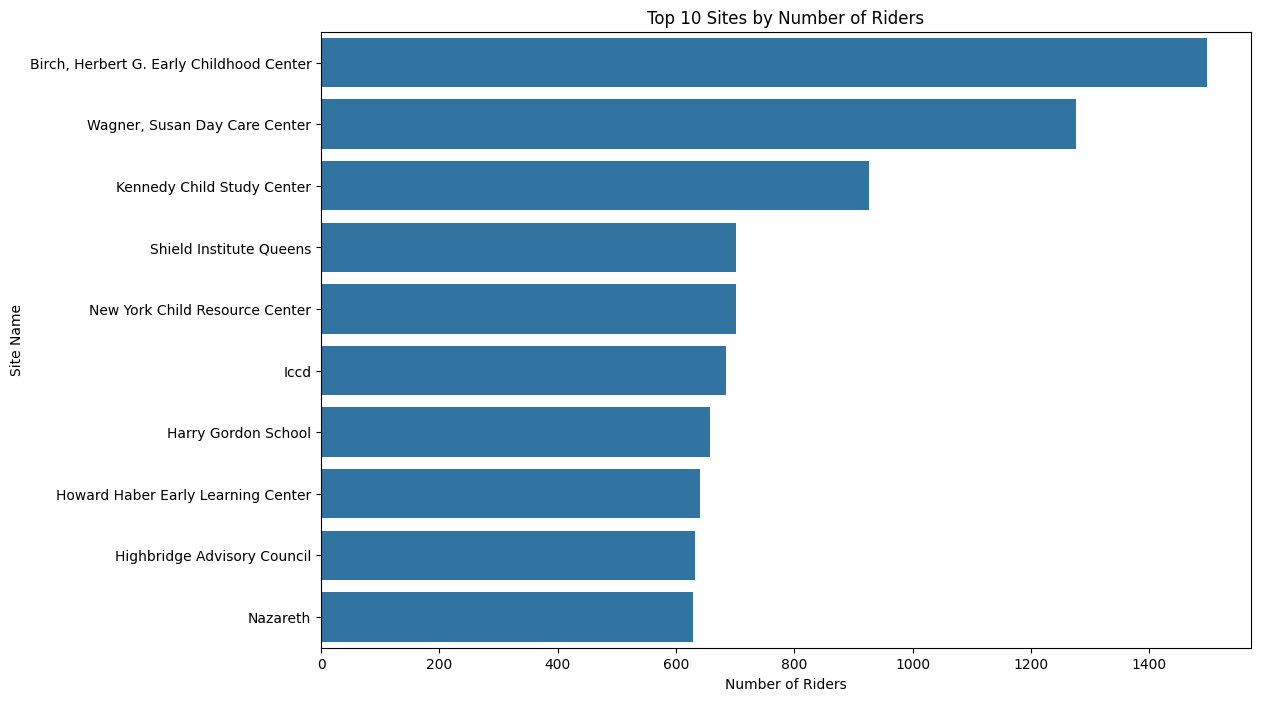

In [104]:
# Calculate total riders by Site Name from Data1
riders_by_site = prek_df.groupby('Site_Name')['Number_of_Riders'].sum().reset_index()
top_sites = riders_by_site.sort_values(by='Number_of_Riders', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y='Site_Name', x='Number_of_Riders', data=top_sites)
plt.title('Top 10 Sites by Number of Riders')
plt.xlabel('Number of Riders')
plt.ylabel('Site Name')
plt.show()

In [106]:
site_type_counts = sites_df.groupby('School_Year')['Site_Type'].value_counts().reset_index()
site_type_counts

,School_Year,Site_Type,count
0,2015-2016,School,3813
1,2015-2016,Pre-K/EI Site,433
2,2015-2016,Office,239
3,2016-2017,School,3847
4,2016-2017,Pre-K/EI Site,440
5,2016-2017,Office,264
6,2017-2018,School,3902
7,2017-2018,Pre-K/EI Site,464
8,2017-2018,Office,275
9,2018-2019,School,3818


In [108]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Site_Type    Office  Pre-K/EI Site  School    All
School_Year                                      
All            1372           2297   19222  22891
2019-2020       305            496    3842   4643
2018-2019       289            464    3818   4571
2017-2018       275            464    3902   4641
2016-2017       264            440    3847   4551
2015-2016       239            433    3813   4485
------------------------------------------------------------------------------------------------------------------------


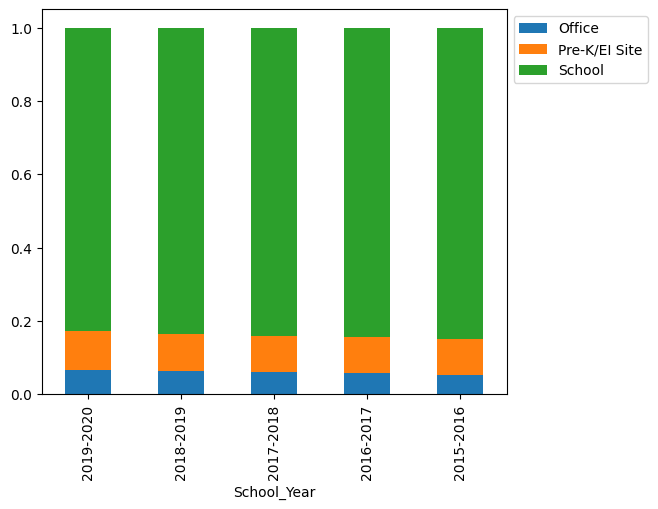

In [109]:
stacked_barplot(sites_df, "School_Year", "Site_Type")

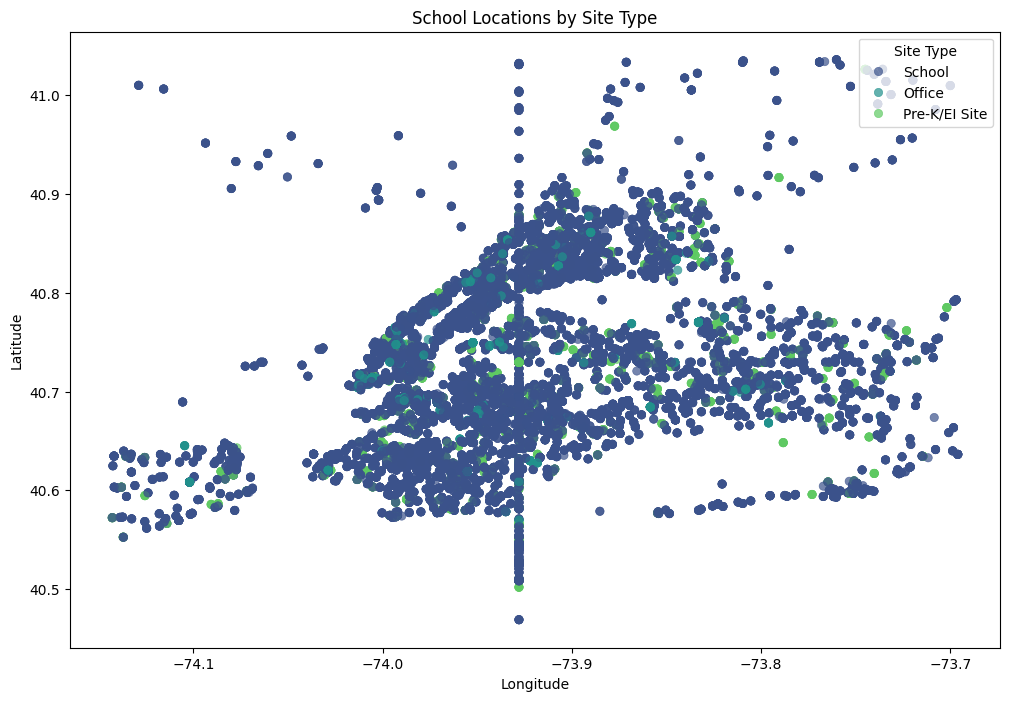

In [105]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sites_df,
    x='Longitude',
    y='Latitude',
    hue='Site_Type',
    palette='viridis',
    alpha=0.7,
    edgecolor=None
)
plt.title('School Locations by Site Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Site Type', loc='upper right')
plt.show()

In [119]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target, hue):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        hue=hue,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        hue=hue,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=hue, palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        hue=hue,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

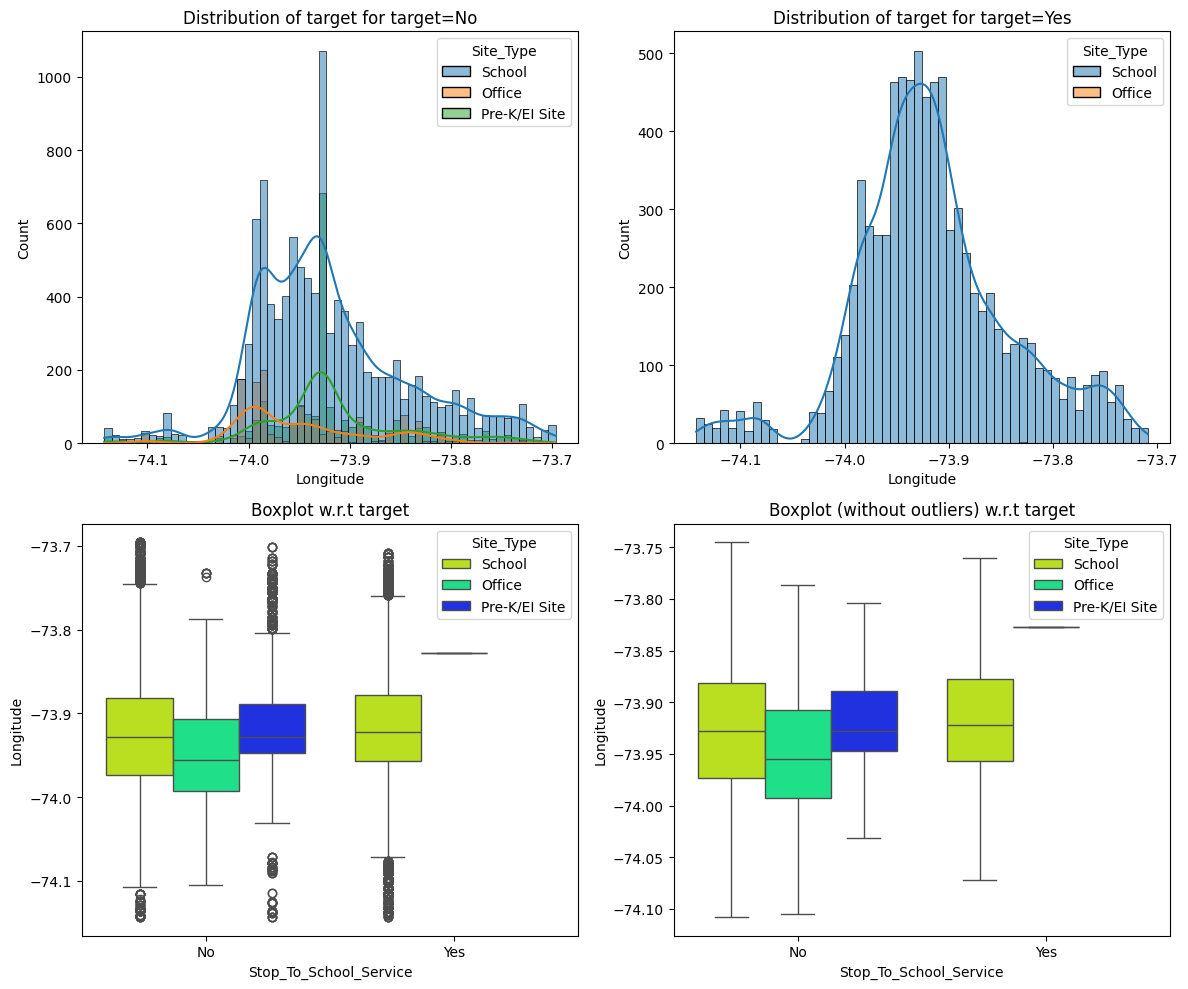

In [121]:
distribution_plot_wrt_target(sites_df, "Longitude", "Stop_To_School_Service", "Site_Type")